In [1]:
#Importing libraries and data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
data= pd.read_csv('C:/Users/Stevelal/Data set and questions/Advertising.csv')
data= data.set_index('Index')
data

,TV,Radio,Newspaper,Sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


 1. Explain the dataset


In [2]:
#Checking data types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
#Checking null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
# Checking the column heads
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Text(0, 0.5, 'Radio')

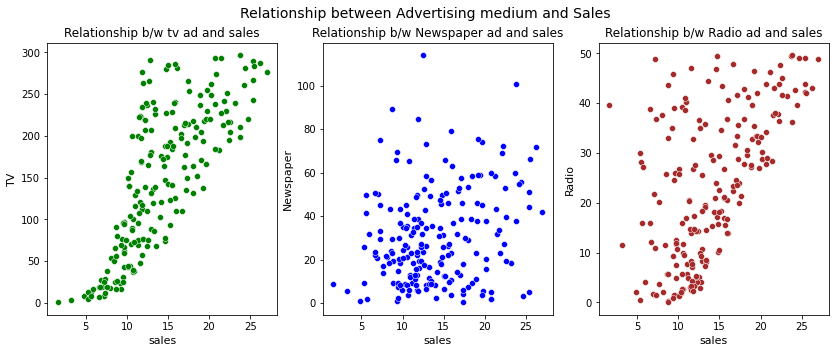

In [5]:
# Checking the relationship between the advertisment mediiums and sales

plt.figure(figsize=(14,5))
plt.suptitle('Relationship between Advertising medium and Sales', fontsize= 14)

plt.subplot(131)
sns.scatterplot(x='Sales',y='TV', data=data, color='green')
plt.title('Relationship b/w tv ad and sales', fontsize= 12)
plt.xlabel('sales', fontsize= 11)
plt.ylabel('TV', fontsize=11)

plt.subplot(132)
sns.scatterplot(x='Sales',y='Newspaper', data=data, color='blue')
plt.title('Relationship b/w Newspaper ad and sales', fontsize= 12)
plt.xlabel('sales', fontsize= 11)
plt.ylabel('Newspaper', fontsize= 11)

plt.subplot(133)
sns.scatterplot(x='Sales',y='Radio', data=data, color='brown')
plt.title('Relationship b/w Radio ad and sales', fontsize= 12)
plt.xlabel('sales', fontsize= 11)
plt.ylabel('Radio', fontsize= 11)

2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [6]:
# Checking the statistics summary of data variables

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'Boxplot of advertisement and sales')

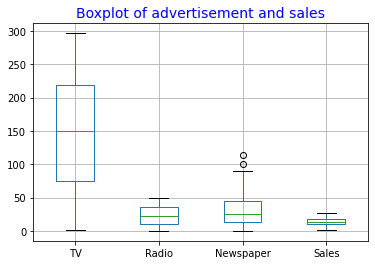

In [7]:
# Boxploting the Variables

bx= data[['TV','Radio','Newspaper','Sales']].boxplot()
bx.set_title('Boxplot of advertisement and sales', fontsize=14, color= 'blue')

3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

For checking the amount spent we set the hypothesis as:
 
Null Hypothesis (Ho): The amount spend are same for the three advertisements.

Alternative Hypothesis (H1): The amount spend are different for the three advertisements.

We use ANOVA test for testing whether there is a significant difference between mean of the three independent groups.

In [8]:
# Conducting ANOVA and its results

F_value, p_val = stats.f_oneway(data['TV'], data['Radio'],data['Newspaper'])
print("F value =",F_value,"\np value=",p_val)
alpha = 0.05
if p_val >= alpha:
    print("We fail to reject the null hypothesis based on the sample.\nTherefore, Same amount were spend for the three advertisements.")
else:
    print("We fail to accept the null hypothesis based on the sample.\nTherefore, Different amounts were spend for the three advertisements.")

F value = 358.8514595342597 
p value= 4.552931539744962e-103
We fail to accept the null hypothesis based on the sample.
Therefore, Different amounts were spend for the three advertisements.
